<a href="https://colab.research.google.com/github/silvi-no26/c_vision/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


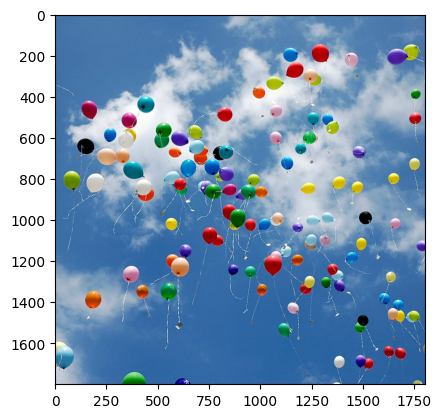

In [2]:
import matplotlib.pyplot as plt
import skimage as sk
from skimage import io

from skimage.filters import threshold_otsu
from skimage.measure import label

# 1. read RGB image
I = sk.io.imread('/content/drive/MyDrive/images_cv/ballons.webp')
plt.imshow(I)

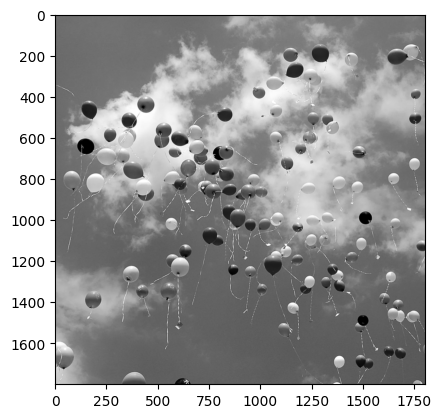

In [7]:
IG = sk.color.rgb2gray(I) # Convert RGB image to grayscale
plt.imshow(IG,cmap='gray')

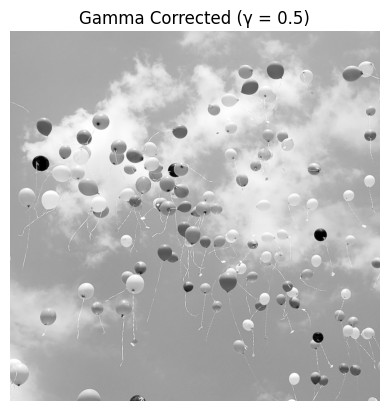

In [24]:
import matplotlib.pyplot as plt
from skimage import exposure, img_as_float

# Convert to float
I_float = img_as_float(IG)

# Apply gamma correction (gamma < 1 => brighter)
gamma_corrected = exposure.adjust_gamma(IG, gamma=0.5)

# Display only the gamma-corrected image in grayscale
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma Corrected (γ = 0.5)')
plt.axis('off')
plt.show()

0.576171875


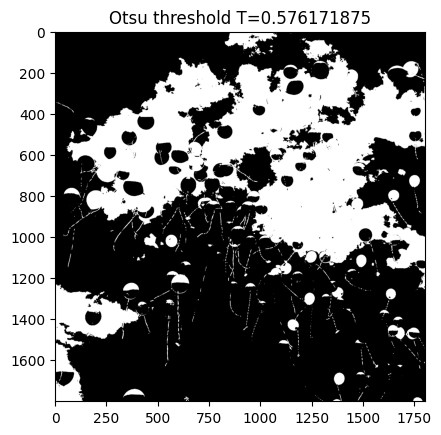

In [47]:
#Apply otsu to the grayscale image
from skimage.filters import threshold_otsu
#Apply Otsu
thresh = threshold_otsu(IG)
print(thresh)
binary_image = IG > thresh
imgplot = plt.imshow(binary_image,cmap='gray')
plt.title('Otsu threshold T={}'.format(thresh))
plt.show()

0.740234375


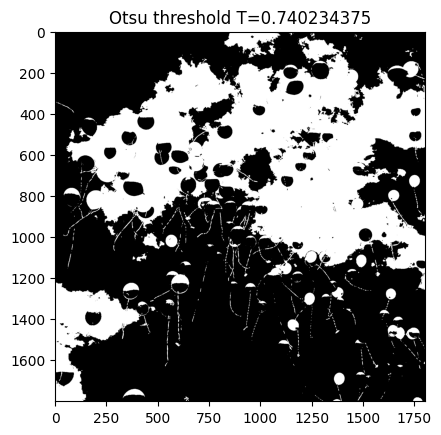

In [48]:
#Apply otsu to the gamma corrected image
from skimage.filters import threshold_otsu
#Apply Otsu
thresh1 = threshold_otsu(gamma_corrected)
print(thresh1)
binary_img = gamma_corrected > thresh1
imgplot = plt.imshow(binary_img,cmap='gray')
plt.title('Otsu threshold T={}'.format(thresh1))
plt.show()

number of regions is 918


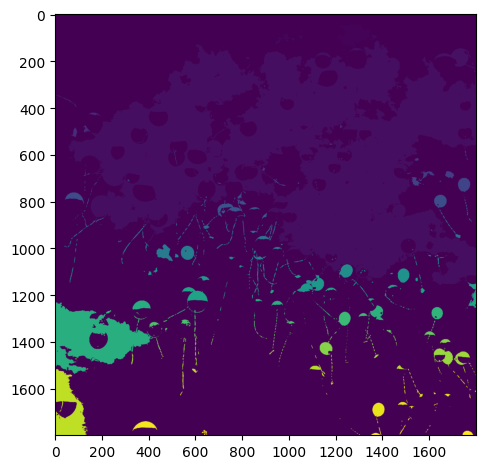

In [31]:
from skimage.measure import label
import matplotlib.pyplot as plt
from skimage.measure import regionprops
import numpy as np

label_image, nregions = label(binary_image, return_num=True)

plt.imshow(label_image)
print('number of regions is {}'.format(nregions))
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity'])

df_features = pd.DataFrame(props)
df_features.head()

,label,area,eccentricity
0,1,13343.0,0.941463
1,2,60.0,0.782744
2,3,4.0,0.948683
3,4,1.0,0.000000
4,5,1.0,0.000000


<Axes: xlabel='area', ylabel='eccentricity'>

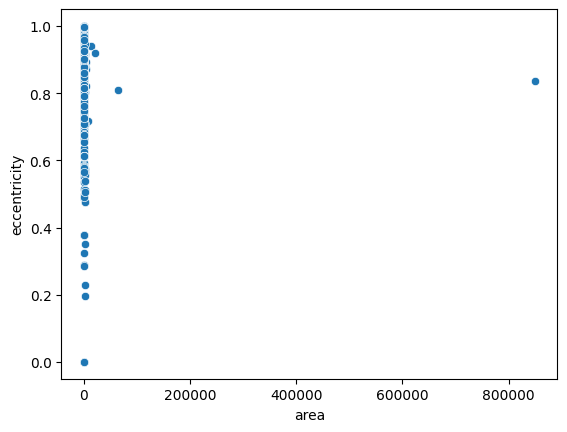

In [35]:
import seaborn as sns

sns.scatterplot(x='area', y='eccentricity', data=df_features)

In [43]:
balloon_indexes = df_features.loc[(df_features['area'] > 500) & (df_features['eccentricity'] < 0.8), 'label'].values
print('Indexes of balloons:', balloon_indexes)

Indexes of balloons: [  8 168 184 219 382 386 455 473 591 599 624 753 786 888]


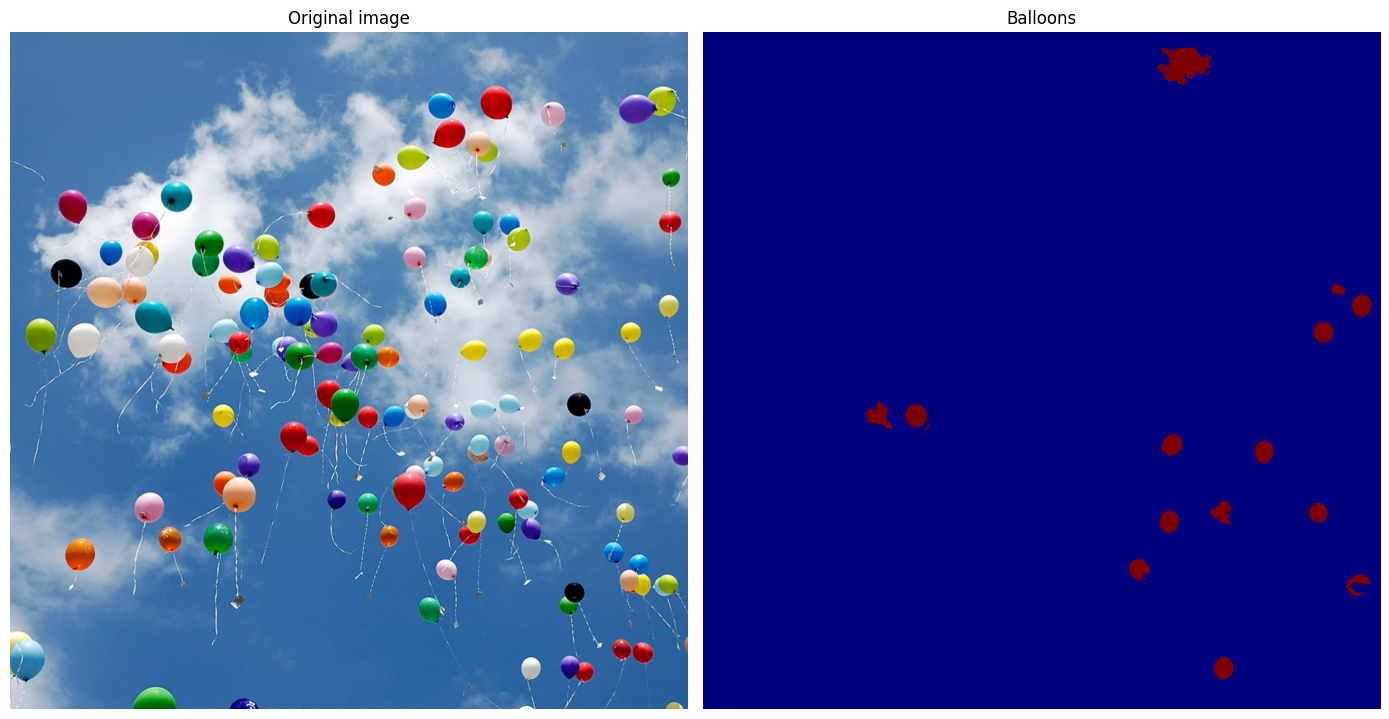

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# balloon_labels from your df_balloons['label']
balloon_labels = df_balloons['label'].values

# Create the balloon mask (True where label_image is one of the balloon labels)
mask_balloons = np.isin(label_image, balloon_labels)

fig, axes = plt.subplots(1, 2, figsize=(14, 9))
ax = axes.ravel()

ax[0].imshow(I)  # original image
ax[0].set_title('Original image')
ax[0].set_axis_off()

ax[1].imshow(mask_balloons, cmap=plt.cm.jet)
ax[1].set_title('Balloons')
ax[1].set_axis_off()

plt.tight_layout()
plt.show()